# TP3 - Fouille de de Données
>REUX Charly / THOMAS Matilin

## Imports et installations

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install impyute
!pip install sklearn

  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


You should consider upgrading via the 'C:\Users\charl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


^C
^C


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\charl\AppData\Local\Programs\Python\Python310\python.exe' 'C:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\charl\AppData\Local\Temp\tmp_3vu_vuo'
         cwd: C:\Users\charl\AppData\Local\Temp\pip-install-s0bup9wn\scipy_d8e18ddf45ad448f8e407271417857c1
    Complete output (138 lines):
    setup.py:461: UserWarning: Unrecognized setuptools command ('dist_info --egg-base C:\Users\charl\AppData\Local\Temp\pip-modern-metadata-fx3un9b8'), proceeding with generating Cython sources and expanding templates
      warnings.warn("Unrecognized setuptools command ('{}'), proceeding with "
    Running from SciPy source directory.
    lapack_opt_info:
    lapack_mkl_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries mkl_rt n

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Install

        libraries satlas,satlas not found in C:\
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries lapack_atlas not found in C:\Users\charl\AppData\Local\Programs\Python\Python310\libs
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries satlas,satlas not found in C:\Users\charl\AppData\Local\Programs\Python\Python310\libs
      <class 'numpy.distutils.system_info.atlas_3_10_info'>
        NOT AVAILABLE
  
      atlas_threads_info:
      Setting PTATLAS=ATLAS
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries lapack_atlas not found in C:\Users\charl\AppData\Local\Programs\Python\Python310\lib
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler


      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries lapack_atlas not found in C:\
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries satlas,satlas not found in C:\
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries lapack_atlas not found in C:\Users\charl\AppData\Local\Programs\Python\Python310\libs
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries satlas,satlas not found in C:\Users\charl\AppData\Local\Programs\Python\Python310\libs
      <class 'numpy.distutils.system_info.atlas_3_10_info'>
        NOT AVAILABLE
  
      atlas_threads_info:
      Setting PTATLAS=ATLAS
      No module named 'numpy.distutils._msvccompiler' i

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

You should consider upgrading via the 'C:\Users\charl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
Using legacy 'setup.py install' for matplotlib, since package 'wheel' is not installed.
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'done'


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score

## 1.Exploratory Data Analysis

### 1. and 2. Data Acquisition and Description

In [66]:
dfTrain = pd.read_csv("datasets/adult_traindata.csv")
dfTest= pd.read_csv("datasets/adult_testdata.csv")
dfAll = pd.concat([dfTrain,dfTest])
dfAll

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
dfTrain

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
dfTest

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### 3. Data Analysis

In [6]:
# adding a new colum with 1 if income >50k
dfTmp = dfAll.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfAll["Income"]=dfTmp
#re-indexing
dfAll = dfAll.reset_index()

In [7]:
sb.set_theme(style="ticks")

#### Describe

In [8]:
dfDesc = dfAll.describe()
dfDesc

,index,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income
count,48840.000000,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000,48840.000000
mean,13566.166667,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400,0.239292
std,8999.200723,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697,0.426655
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6104.750000,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,12209.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,20349.250000,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,32559.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### General distribution

D:\Program Files (x86)\Python9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Program Files (x86)\Python9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Program Files (x86)\Python9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Program Fi

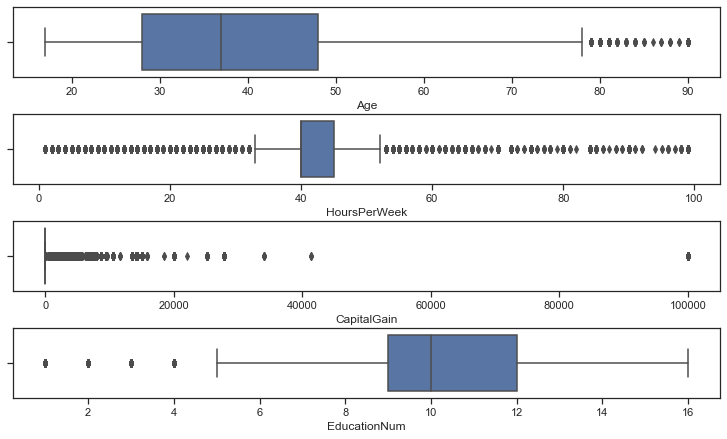

In [9]:
fig, axs = plt.subplots(nrows=4,figsize=(10,6))
sb.boxplot(dfAll["Age"],ax=axs[0])
sb.boxplot(dfAll["HoursPerWeek"],ax=axs[1])
sb.boxplot(dfAll["CapitalGain"],ax=axs[2])
sb.boxplot(dfAll["EducationNum"],ax=axs[3])
fig.tight_layout(pad=0.3)

#### Income depending on gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

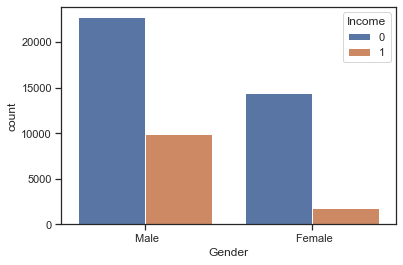

In [10]:
sb.countplot(hue="Income",x="Gender",data=dfAll)

#### Number of people with income >50k depending on the Age

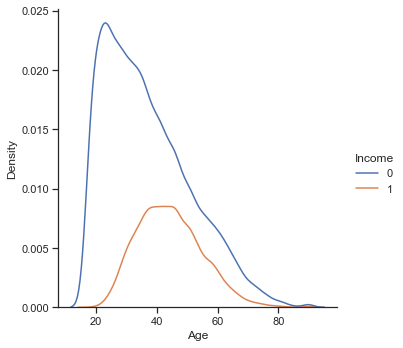

In [11]:

sb.displot(x="Age",hue="Income",data=dfAll,kind="kde")

#### Income depending on hoursWorked per week

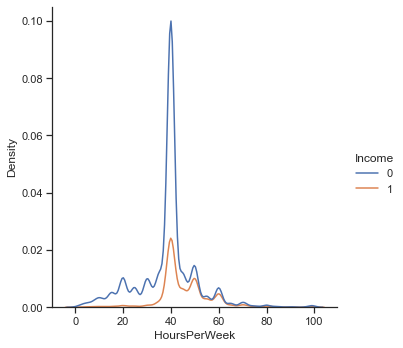

In [12]:
sb.displot(x="HoursPerWeek",hue="Income",data=dfAll,kind="kde")

#### Same statistic but with the age

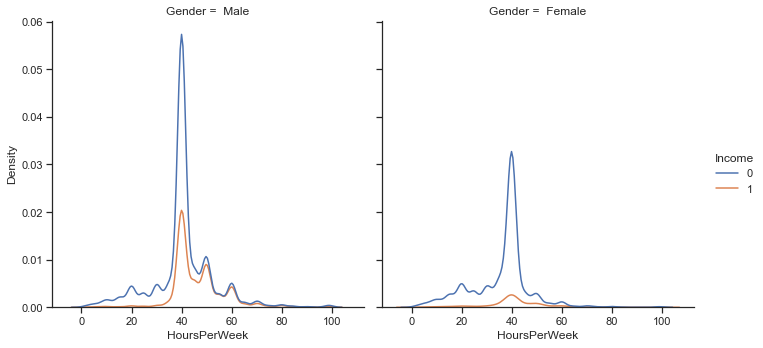

In [13]:
sb.displot(x="HoursPerWeek",hue="Income",data=dfAll,kind="kde", col="Gender")

#### TODO : 
>(a)  Describe the distribution of each variable.
>
>(b)  Describe the relationship between each input variable and the target variable(Income).
>
>Note : a correlation heatmap is a graphical representation of a correlationmatrix between multiple variables.
>
> TODO Important : make the coreslation matrix with the one hot enoding of all the non numerical values

#### Correlation matrix between all the values with one hot encoding

In [14]:
categories=["Income","WorkClass","Education","MaritalStatus","Occupation","Relationship","Race","Gender","NativeCountry"]
dfMatrix = pd.get_dummies(dfAll,prefix_sep="_",columns=categories)


<AxesSubplot:>

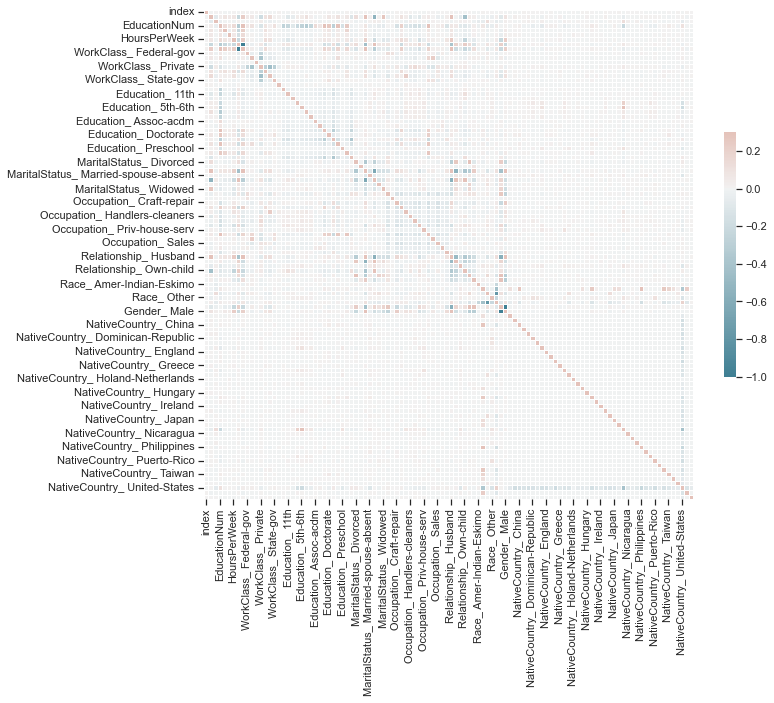

In [15]:
corr = dfMatrix.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sb.diverging_palette(220, 20, as_cmap=True)

sb.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
dfMatrix

,index,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income_0,Income_1,WorkClass_ Federal-gov,...,NativeCountry_ Portugal,NativeCountry_ Puerto-Rico,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia
0,0,50,83311,13,0,0,13,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,215646,9,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,53,234721,7,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,28,338409,13,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,37,284582,14,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,16275,39,215419,13,0,0,36,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48836,16276,64,321403,9,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48837,16277,38,374983,13,0,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,16278,44,83891,13,5455,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering

### 1. Dealing with missing value

In [17]:
dfMissing = dfAll.isnull().sum()
print("Number of rows : " + str(dfMissing["index"].size))
print("Missing Data per colum:")
dfMissing

Number of rows : 1
Missing Data per colum:


index               0
Age                 0
WorkClass        2799
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     857
Income              0
dtype: int64

In [18]:
dfAll["EducationNum"].unique()



array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

>TODO :We want to use the MICE algorythm to take care of missing values so we first need to formate the dataframe.
>
>For now, we will just drop the missing values

In [19]:
dfAll = dfAll.dropna()

### 2. Combining categories
>We decided to use the one hot encoder to deal with workclass and maritalstatus.And chose to combine the other columns in two different ones.

In [20]:
#combining gender, race and education in one colum and dropping the former colums 
dfAll["GenRaceEdu"] = (dfAll["Gender"].astype("str")+"_"+ dfAll["Race"].astype("str")+"_"+ dfAll["Education"].astype("str"))
dfAll = dfAll.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfAll["CountryOccup"] = (dfAll["NativeCountry"].astype("str")+"_"+ dfAll["Occupation"].astype("str"))
dfAll = dfAll.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfAll = pd.get_dummies(dfAll,prefix_sep="_",columns=categories)

In [21]:
dfAll

,index,Age,fnlwgt,EducationNum,Relationship,CapitalGain,CapitalLoss,HoursPerWeek,Income,GenRaceEdu,...,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,WorkClass_ Without-pay,MaritalStatus_ Divorced,MaritalStatus_ Married-AF-spouse,MaritalStatus_ Married-civ-spouse,MaritalStatus_ Married-spouse-absent,MaritalStatus_ Never-married,MaritalStatus_ Separated,MaritalStatus_ Widowed
0,0,50,83311,13,Husband,0,0,13,0,Male_ White_ Bachelors,...,1,0,0,0,0,1,0,0,0,0
1,1,38,215646,9,Not-in-family,0,0,40,0,Male_ White_ HS-grad,...,0,0,0,1,0,0,0,0,0,0
2,2,53,234721,7,Husband,0,0,40,0,Male_ Black_ 11th,...,0,0,0,0,0,1,0,0,0,0
3,3,28,338409,13,Wife,0,0,40,0,Female_ Black_ Bachelors,...,0,0,0,0,0,1,0,0,0,0
4,4,37,284582,14,Wife,0,0,40,0,Female_ White_ Masters,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,16274,33,245211,13,Own-child,0,0,40,0,Male_ White_ Bachelors,...,0,0,0,0,0,0,0,1,0,0
48835,16275,39,215419,13,Not-in-family,0,0,36,0,Female_ White_ Bachelors,...,0,0,0,1,0,0,0,0,0,0
48837,16277,38,374983,13,Husband,0,0,50,0,Male_ White_ Bachelors,...,0,0,0,0,0,1,0,0,0,0
48838,16278,44,83891,13,Own-child,5455,0,40,0,Male_ Asian-Pac-Islander_ Bachelors,...,0,0,0,1,0,0,0,0,0,0


### 3. Binning continuous variables
>The only continuous variable that we can take care of is the age that we will cut by using the qcut function of python
>
>What the line of code does here is splitting the values into 20 equal parts and then rounding the values obtained

In [22]:
dfAll["Age"] = pd.qcut(dfAll["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))

### 4. Dropping irrelevant features
>We decided to drop these values because they did not seem to have a very important impact on the Income

In [23]:
dfAll= dfAll.drop(["CapitalGain","CapitalLoss","fnlwgt","index","Relationship"],axis=1)

### 5. Transform variables into numerical variables
>In this part, we had to deal with the colum "GenRaceEdu" and "CountryOccup" that we previously created. We chose to automatically replace all values with their corresponding index on the unique list of the column

In [24]:
GRElabels = dfAll['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfAll.replace({'GenRaceEdu':mapping},inplace=True)

In [25]:
COlabels = dfAll['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfAll.replace({'CountryOccup':mapping},inplace=True)

### 1. TODO:Dealing with missing values With MICE

## 3. Model building and evaluation

### 1.Extracting input and output vectors

In [26]:
Y = dfAll["Income"]
X = dfAll.drop(["Income"],axis=1)
tabScores = []

### 3. Training all the classifiers on the data

#### a) Linear Regression

In [27]:
LgReg = LogisticRegression(max_iter=2000)#obligé de changer le nombre max d'iteration sinon insuffisant
LgReg.fit(X,Y)
tabScores.append(LgReg.score(X,Y))

#### b) Support Vector Machine

In [28]:
supp = svm.SVC()
supp.fit(X, Y)
tabScores.append(supp.score(X,Y))

 #### c) gaussian Naive bayes

In [29]:
gaussian = GaussianNB()
gaussian.fit(X, Y)
tabScores.append(gaussian.score(X,Y))

#### d)Decision Tree

In [30]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(X, Y)
tabScores.append(dectree.score(X,Y))

#### e) Random Forest

In [31]:
rdf = RandomForestClassifier()
rdf.fit(X, Y)
tabScores.append(rdf.score(X,Y))

>Here are the results,but because we trained our data without a distinct test set and training set, the results are not really representative of the real efficiency that the classifiers would have in a real predicting environment.

In [32]:
tabScores

[0.8236620964175144,
 0.810327288810261,
 0.7217381689517912,
 0.9416850950906679,
 0.9415966386554622]

#### 3.4 Training the classifiers with random split
>To prevent the results from being to biased by the test on same data as the train, we use the *train_test_split* function wich splits the data so that we can have two different sets.

In [33]:
trainsplit, trainsplit2= train_test_split(dfAll)
trainsplit2
X1=trainsplit.drop(['Income'],axis=1)
Y1=trainsplit['Income']

X2=trainsplit2.drop(['Income'],axis=1)
Y2=trainsplit2['Income']
tabScores2 = []

#### a) Linear Regression

In [34]:
LgReg2 = LogisticRegression(max_iter=2000)
LgReg2.fit(X1,Y1)
tabScores2.append(LgReg2.score(X2,Y2))

#### b) Support Vector Machine

In [35]:
supp2 = svm.SVC()
supp2.fit(X1, Y1)
tabScores2.append(supp2.score(X2,Y2))

 #### c) Gaussian Naive bayes

In [36]:
gaussian2 = GaussianNB()
gaussian2.fit(X1, Y1)
tabScores2.append(gaussian2.score(X2,Y2))

#### d) Decision Tree

In [37]:
dectree2 = tree.DecisionTreeClassifier()
dectree2.fit(X1, Y1)
tabScores2.append(dectree2.score(X2,Y2))

#### e) Random Forest

In [38]:
rdf2 = RandomForestClassifier()
rdf2.fit(X1, Y1)
tabScores2.append(rdf2.score(X2,Y2))

>Logically, the results that we get from these test are not as good as the previous ones, and the best classifier seems to be the suport vector machine for now.

In [39]:
tabScores2

[0.8251216275984078,
 0.8113224237063247,
 0.7179124281291464,
 0.7842547545333923,
 0.8183104820875718]

## 4. K-fold cross validation
>But the results are still not fully representative of all the data because we trained only one on part of it. To counter this we will use the **K-fold cross validation**.
>
>We decided to split our dataset in 10 and then make a mean on the obtained scores.

In [40]:
tabScoresCrossVal = []
tabScoresCrossVal.append(cross_val_score(LgReg2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(supp2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(dectree2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(rdf2, X, Y, cv=10).mean())
tabScoresCrossVal

[0.8231977001326847,
 0.8086023883237505,
 0.7203892083149048,
 0.7879920389208315,
 0.8144626271561257]

>Now our best classifier is the Logistic Regression.

## 5. More on model evaluation
>Our results are decent now, but we can still make them better by tuning the hyper-parameters.
>
>To do so, we will use **Grid search with cross validation**
>
>(note: the Gaussian naive Bayes parameters cannot be tweaked)
>
>\*From this part, the algorythms tend to take quite a long time to execute, so we've written down the results in the part 7

In [41]:
Gtrainsplit, Gtrainsplit2= train_test_split(dfAll)
Gtrainsplit2
X1=Gtrainsplit.drop(['Income'],axis=1)
Y1=Gtrainsplit['Income']

X2=Gtrainsplit2.drop(['Income'],axis=1)
Y2=Gtrainsplit2['Income']
GtabScores2 = []

##### a) Logistic regression

In [42]:
GLgReg2 = LogisticRegression()
grid=dict(C=np.logspace(0, 4, 10), penalty=['l1', 'l2'],solver=['liblinear'])
GLgReg2 = GridSearchCV(GLgReg2,grid)
GLgReg2.fit(X1,Y1)
GtabScores2.append(GLgReg2.score(X2,Y2))
print("best params: ",GLgReg2.best_params_)

best params:  {'C': 7.742636826811269, 'penalty': 'l1', 'solver': 'liblinear'}


##### b) Support Vector Machine

In [43]:
Gsupp2 = svm.SVC()
grid={'C': [1,4], 'gamma': [0.01,0.001]}
Gsupp2 = GridSearchCV(Gsupp2,grid)
Gsupp2.fit(X1, Y1)
GtabScores2.append(Gsupp2.score(X2,Y2))
print("best params: ",Gsupp2.best_params_)

best params:  {'C': 4, 'gamma': 0.001}


##### c) Decision tree

In [44]:
Gdectree2 = tree.DecisionTreeClassifier()
grid={'criterion': ['gini','entropy'], 'splitter': ["best","random"]}
Gdectree2 = GridSearchCV(Gdectree2,grid)
Gdectree2.fit(X1, Y1)
GtabScores2.append(Gdectree2.score(X2,Y2))
print("best params: ",Gdectree2.best_params_)

best params:  {'criterion': 'entropy', 'splitter': 'best'}


##### d) Random Forest

In [45]:
Grdf2 = RandomForestClassifier()
grid={'n_estimators': [50,200,10], 'criterion': ['gini','entropy']}
Grdf2 = GridSearchCV(Grdf2,grid)
Grdf2.fit(X1, Y1)
GtabScores2.append(Grdf2.score(X2,Y2))
print("best params: ",Grdf2.best_params_)

best params:  {'criterion': 'gini', 'n_estimators': 200}


>Here are the scores obtained on the data splitted in two.

In [46]:
GtabScores2

[0.8275099513489607, 0.8287483414418398, 0.789827509951349, 0.8183989385227776]

>The best classifier seems to be the SVM.
>
>Now we can try the k-cross validation on these classifiers

In [47]:
tabGScoresCrossVal = []
tabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10).mean())
tabGScoresCrossVal

[0.8232861565678903,
 0.8235957540911102,
 0.7203892083149048,
 0.7898717381689517,
 0.8152145068553738]

**Notes on the results:**

The results that we obtained show that the best classifier is the SVM , so this is the one that we will use for the real case scenario. The parameters that the gridSearched algorythm found for us are {'C': 4, 'gamma': 0.001} 

### 3.Other evaluation metrics
>To verify more precisely the classifiers we are going to try 3 other evaluation metrics:
> * Average Precision Score
> * Brier Score Loss
> * F1_Score

##### a) Average_precision_score
>AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:
$$ AP = \sum _{i=1} ^{10} (R_{n} - R_{n-1})P_{n} $$
>$ P_{n} $ and $ R_{n} $ are the precision and recall at the nth threshold


In [49]:
PrectabGScoresCrossVal = []
PrectabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal

[0.6791929321814216,
 0.6778809319642506,
 0.5696610080485319,
 0.46126838474120013,
 0.6512616444269919]

##### b) Brier_score_loss
>The Brier score measures the mean squared difference between the predicted probability and the actual outcome.(the lower the better)


In [50]:
BriertabGScoresCrossVal = []
BriertabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal

D:\Program Files (x86)\Python9\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\utils\metaestimators.py", line 114, in __g

D:\Program Files (x86)\Python9\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Program Files (x86)\Python9\lib\site-packages\sklearn\utils\metaestimators.py", line 114, in __g

[-0.1199905399631029,
 nan,
 -0.2381620684479536,
 -0.19034334895882427,
 -0.13004523178870125]

##### c) F1_score
>The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [51]:
FStabGScoresCrossVal = []
FStabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal

[0.5959080905565394,
 0.5842685842196885,
 0.6005387525812635,
 0.5562693470979518,
 0.6022279347400618]

**Notes on the results:**

After having tested these three metrics, and even tho the F1_score isn't as good, we can validate that our best classifier is the SVM.

## 6. Classification on the test dataset

### 1.Training the chosen classifier on the test dataset

#### a) Feature engineering on both train and test dataset

In [67]:
#changing the Income colums with 1 and 0
dfTmp = dfTest.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfTest["Income"]=dfTmp

dfTmp = dfTrain.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfTrain["Income"]=dfTmp

0        0
1        1
2        1
4        0
6        1
        ..
16274    0
16275    0
16277    0
16278    0
16279    1
Name: Income, Length: 15059, dtype: uint8

In [68]:
#Drop the nan values (Change?)
dfTest = dfTest.dropna()
dfTrain = dfTrain.dropna()

In [69]:
            #1 - On dfTest
#combining gender, race and education in one colum and dropping the former colums 
dfTest["GenRaceEdu"] = (dfTest["Gender"].astype("str")+"_"+ dfTest["Race"].astype("str")+"_"+ dfTest["Education"].astype("str"))
dfTest = dfTest.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfTest["CountryOccup"] = (dfTest["NativeCountry"].astype("str")+"_"+ dfTest["Occupation"].astype("str"))
dfTest = dfTest.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfTest = pd.get_dummies(dfTest,prefix_sep="_",columns=categories)

            #2 - On dfTrain
#combining gender, race and education in one colum and dropping the former colums 
dfTrain["GenRaceEdu"] = (dfTrain["Gender"].astype("str")+"_"+ dfTrain["Race"].astype("str")+"_"+ dfTrain["Education"].astype("str"))
dfTrain = dfTrain.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfTrain["CountryOccup"] = (dfTrain["NativeCountry"].astype("str")+"_"+ dfTrain["Occupation"].astype("str"))
dfTrain = dfTrain.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfTrain = pd.get_dummies(dfTrain,prefix_sep="_",columns=categories)

In [70]:
#Binning continuous values
dfTest["Age"] = pd.qcut(dfTest["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))
dfTrain["Age"] = pd.qcut(dfTrain["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))

In [71]:
#Droping irrelevant features
OriginalIncome = dfTest["Income"]
dfTest= dfTest.drop(["CapitalGain","CapitalLoss","fnlwgt","Relationship","Income"],axis=1)
dfTrain= dfTrain.drop(["CapitalGain","CapitalLoss","fnlwgt","Relationship"],axis=1)

In [72]:
    #1 - On dfTest
GRElabels = dfTest['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfTest.replace({'GenRaceEdu':mapping},inplace=True)

COlabels = dfTest['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfTest.replace({'CountryOccup':mapping},inplace=True)

    #2 - On dfTrain
GRElabels = dfTrain['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfTrain.replace({'GenRaceEdu':mapping},inplace=True)

COlabels = dfTrain['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfTrain.replace({'CountryOccup':mapping},inplace=True)

#### b) Training the classifier on the train data
>Now that our data is nicely formated, we can start to train the SVM classifier on it with the parameters found previously.


In [73]:
#Vector creation
XFinal=dfTrain.drop(['Income'],axis=1)
YFinal=dfTrain['Income']

#creating and training our classifier
svmClass = svm.SVC(C=4, gamma= 0.001)
svmClass.fit(XFinal, YFinal)


SVC(C=4, gamma=0.001)

### 2. Predicting the labels on the test dataset

In [74]:
PredictedIncome=svmClass.predict(dfTest)
testFinal = dfTest.copy();
testFinal['IncomePredicted'] = PredictedIncome
testFinal["IncomeOriginal"] = OriginalIncome
testFinal

,Age,EducationNum,HoursPerWeek,GenRaceEdu,CountryOccup,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,...,WorkClass_ Without-pay,MaritalStatus_ Divorced,MaritalStatus_ Married-AF-spouse,MaritalStatus_ Married-civ-spouse,MaritalStatus_ Married-spouse-absent,MaritalStatus_ Never-married,MaritalStatus_ Separated,MaritalStatus_ Widowed,IncomePredicted,IncomeOriginal
0,53,9,50,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,21,12,40,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,68,10,40,2,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,6,30,3,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,95,15,32,4,4,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,37,13,40,7,4,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16275,53,13,36,20,4,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
16277,53,13,50,7,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
16278,68,13,40,36,6,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3. Evaluating the Accuracy

In [75]:
accuracy_score(OriginalIncome, PredictedIncome, normalize=False)

12304

In [76]:
average_precision_score(OriginalIncome, PredictedIncome)

0.44691120227150344

In [77]:
brier_score_loss(OriginalIncome, PredictedIncome)

0.18294707483896674

In [78]:
f1_score(OriginalIncome, PredictedIncome, average='macro')

0.7126895446219921

### Conclusion

The results that we ended up having were not as good as we expected, out of all the 16277 entries of the table, only 12304 were nicely predicted, wich makes a ratio of 0.75. It's not bad, be it could be better, especially by trying to replace the missing values, or maybe tweaking the column merges.

## 7. Some Results
5.a) best params:  {'C': 7.742636826811269, 'penalty': 'l1', 'solver': 'liblinear'}

5.b) best params:  {'C': 4, 'gamma': 0.001}

5.c) best params:  {'criterion': 'entropy', 'splitter': 'best'}

5.d) best params:  {'criterion': 'gini', 'n_estimators': 200}

5.Scores : [0.8275099513489607, 0.8287483414418398, 0.789827509951349, 0.8183989385227776]

5.kcrossScores: [0.8232861565678903,0.8235957540911102,0.7203892083149048,0.7898717381689517,0.8152145068553738]

5.averagePrecision : [0.6791929321814216,0.6778809319642506,0.5696610080485319,0.46126838474120013,0.6512616444269919]

5.brierLoss : [-0.1199905399631029,nan,-0.2381620684479536,-0.19034334895882427,-0.13004523178870125]

5.F1 : [0.5959080905565394,0.5842685842196885,0.6005387525812635,0.5562693470979518,0.6022279347400618]

